In [1]:
from numpy import *
from read_dataset import read_dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from displayData import displayData
from randInitializeWeights import randInitializeWeights
from costFunction import costFunction
from unroll_params import unroll_params
from roll_params import roll_params
from scipy.optimize import *
from predict import predict
from backwards import backwards
from checkNNCost import checkNNCost
from checkNNGradients import checkNNGradients
from sigmoid import sigmoid
from sigmoidGradient import sigmoidGradient

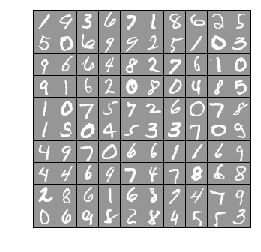

In [2]:
#Reading of the dataset
# You are free to reduce the number of samples retained for training, in order to reduce the computational cost
size_training = 60000     # number of samples retained for training
size_test     = 10000     # number of samples retained for testing
images_training, labels_training, images_test, labels_test = read_dataset(size_training, size_test)

# Randomly select 100 data points to display
random_instances = list(range(size_training))
random.shuffle(random_instances)
displayData(images_training[random_instances[0:100],:])

In [3]:
# Setup the parameters you will use for this exercise
input_layer_size   = 784        # 28x28 Input Images of Digits
num_labels         = 10         # 10 labels, from 0 to 9 (one label for each digit) 

num_of_hidden_layers = int(input('Please select the number of hidden layers: '))
print("\n")

layers = [input_layer_size]
for i in range(num_of_hidden_layers):
    layers = layers + [int(input('Please select the number nodes for the ' + str(i+1) + ' hidden layers: '))]
layers = layers + [num_labels]

Please select the number of hidden layers: 1


Please select the number nodes for the 1 hidden layers: 100


In [4]:
lambd = 0.0
checkNNCost(lambd)

shape of X
(5, 3)
shape of x
(5, 3)
shape of Theta[0]
(5, 4)


ValueError: shapes (5,3) and (5,4) not aligned: 3 (dim 1) != 5 (dim 0)